# Data Preparation
# David Stanko
# 04-08-2024

## a) Data source

Both datasets are daily precipitation datasets that were obtained from [NOAA's Climate Data Online Search tool](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND). The date range entered in the search bar was January 1, 2020 to January 1, 2024. "Daily Summaries" was selected for the weather observation type.

## b) Inspect the Contents of Each Data Set

### Import the necessary libraries.

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

### Load the Seattle and New York data sets, respectively.

In [183]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/seattle_rain.csv')
df_ny = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/ny_rain.csv')

### Use the head() and describe() functions to inspect the columns and contents of the datasets.

In [184]:
df_seattle.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,82.9,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,135.0,2020-01-01,NaN,NaN,0.23,NaN,NaN,NaN,NaN
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,48.2,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,74.1,2020-01-01,NaN,NaN,0.13,NaN,NaN,NaN,NaN
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,112.5,2020-01-01,NaN,NaN,0.22,NaN,NaN,NaN,NaN


The important columns of the Seattle dataset include a string that identifies the station, the name of the station, the date, and the precipitation (PRCP).

In [185]:
df_seattle.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,7003.000000,7003.000000,7003.000000,143.000000,143.000000,6718.000000,3006.000000,1331.000000,0.0,0.0
mean,47.593303,-122.322535,102.045666,5.776224,0.892098,0.132364,0.050000,0.172727,NaN,NaN
std,0.091807,0.023108,31.391744,6.723325,1.585583,0.270202,0.466821,0.960576,NaN,NaN
min,47.444670,-122.382541,37.200000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,47.543999,-122.314420,74.100000,2.000000,0.080000,0.000000,0.000000,0.000000,NaN,NaN
50%,47.611700,-122.312907,112.500000,4.000000,0.420000,0.010000,0.000000,0.000000,NaN,NaN
75%,47.696532,-122.308500,121.300000,6.000000,1.000000,0.140000,0.000000,0.000000,NaN,NaN
max,47.702387,-122.303810,135.600000,53.000000,11.400000,3.010000,10.000000,11.000000,NaN,NaN


Based on the counts, there is missing data in the following columns: DAPR, MDPR, PRCP, SNOW, and SNWD. There is no data at all in the DASF and MDSF columns.

The maximum values in the DAPR, MDPR, PRCP, SNOW, and SNWD columns are large compared to the other percentiles. However, we won't use most of those columns except for PRCP. There is no need to remove outliers for PRCP. Outliers are normal because, most of the time, it's not raining. Furthermore, there are rain events where it rains a lot compared to the average amount of rainfall.

In [186]:
df_ny.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,117.3,2020-01-01,NaN,NaN,0.06,0.0,0.0,NaN,NaN
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,4.3,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,22.8,2020-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,43.3,2020-01-01,NaN,NaN,0.00,0.0,NaN,NaN,NaN


Just like the Seattle dataset, the important columns of the New York dataset include a string that identifies the station, the name of the station, the date, and the precipitation (PRCP).

In [187]:
df_ny.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,17465.000000,17465.000000,17465.000000,155.000000,151.000000,17275.000000,11508.000000,6318.000000,0.0,0.0
mean,40.826103,-73.697762,48.792551,5.187097,0.835695,0.136644,0.043483,0.255033,NaN,NaN
std,0.189215,0.210564,46.087915,5.581494,1.253480,0.396871,0.520562,1.465410,NaN,NaN
min,40.615654,-74.145561,2.100000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,40.668899,-73.823290,4.300000,2.000000,0.070000,0.000000,0.000000,0.000000,NaN,NaN
50%,40.758947,-73.710999,42.700000,3.000000,0.390000,0.000000,0.000000,0.000000,NaN,NaN
75%,41.091681,-73.505371,91.700000,5.000000,1.010000,0.060000,0.000000,0.000000,NaN,NaN
max,41.150120,-73.358045,175.000000,42.000000,7.000000,9.450000,16.000000,18.000000,NaN,NaN


Just like the Seattle dataset, there is missing data in the DAPR, MDPR, SNOW, and SNWD columns, and there is no data in the DASF and MDSF columns. There is a little bit of missing data in the PRCP column.

Like in the Seattle dataset, the maximum values in the DAPR, MDPR, PRCP, SNOW, and SNWD columns are large compared to the other percentiles. We won't remove the outliers for the reasons previously stated.

### Check that both datasets have the same columns

In [188]:
print(df_seattle.columns)
print(df_ny.columns)

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'DASF', 'MDSF'],
      dtype='object')
Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'DASF', 'MDSF'],
      dtype='object')


Check that the unique column names are the same in both datasets.

In [189]:
set(df_seattle.columns) == set(df_ny.columns)

True

From the code cell above, we know that the unique column names are the same in both datasets.

Now let's check whether there are duplicate column names in either dataset.

In [190]:
print(df_seattle.columns.unique() == df_seattle.columns)
print(df_seattle.columns.unique().equals(df_seattle.columns))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
True


In [191]:
print(df_ny.columns.unique() == df_ny.columns)
print(df_ny.columns.unique().equals(df_ny.columns))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
True


Based on the previous two cells, there are no duplicate column names in either dataset.

### Check how many rows and how many unique stations are in each DataFrame

In [192]:
print(df_seattle.shape)
print(df_ny.shape)

print(len(df_seattle["STATION"].unique()))
print(df_seattle["PRCP"].sum())

print(len(df_ny["STATION"].unique()))
print(df_ny["PRCP"].sum())

(7003, 13)
(17465, 13)
10
889.22
20
2360.53


The Seattle DataFrame has only 7003 rows, but the New York DataFrame has 17,465 rows.

Let's see if the row number mismatch is because there are more weather stations in New York. Additionally, let's sum all the precipitation in each dataset to see if New York having more data means that it rains more there.

In [193]:
print(len(df_seattle["STATION"].unique()))
print(df_seattle["PRCP"].sum())
print(len(df_ny["STATION"].unique()))
print(df_ny["PRCP"].sum())

10
889.22
20
2360.53


There are 20 stations in New York but only 10 stations in Seattle. When we sum the precipitation, there is more precipitation in New York. But, since there are more stations where precipitation is measured, that makes sense.

## c) Convert data types of columns of the data frames to the correct types

Let's check the data types of all the columns in each dataset.

In [194]:
df_seattle.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

In [195]:
df_ny.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

In both DataFrames, the DATE column needs to be converted to a DateTime type instead of a string.

The following two cells convert the DATE column in each dataset to the correct type.

In [196]:
df_seattle["DATE"] = pd.to_datetime(df_seattle["DATE"])
df_seattle.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

In [197]:
df_ny["DATE"] = pd.to_datetime(df_ny["DATE"])
print(df_ny.dtypes)

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object


The type of the DATE column in both datasets is now datetime64[ns], the correct data type.

## d) Remove unnecessary parts of the data sets (e.g. duplicate entries, dates beyond the desired range, etc.)

### Dropping unnecessary columns

Let's run the head() function to see the column names one more time so we can see which columns are unnecessary.

In [198]:
df_seattle.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,82.9,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,135.0,2020-01-01,NaN,NaN,0.23,NaN,NaN,NaN,NaN
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,48.2,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,74.1,2020-01-01,NaN,NaN,0.13,NaN,NaN,NaN,NaN
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,112.5,2020-01-01,NaN,NaN,0.22,NaN,NaN,NaN,NaN


In [199]:
df_ny.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,117.3,2020-01-01,NaN,NaN,0.06,0.0,0.0,NaN,NaN
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,4.3,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,22.8,2020-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,43.3,2020-01-01,NaN,NaN,0.00,0.0,NaN,NaN,NaN


We won't need the following columns in our analysis: ELEVATION, DAPR, MDPR, SNOW, SNWD, DASF, MDSF.

The next code cell removes the unnecessary columns from both datasets.

In [200]:
cols_to_drop = ["ELEVATION", "DAPR", "MDPR", "SNOW", "SNWD", "DASF", "MDSF"]
df_seattle = df_seattle.drop(columns=cols_to_drop)
df_ny = df_ny.drop(columns=cols_to_drop)

In [201]:
df_seattle.head()

,STATION,NAME,LATITUDE,LONGITUDE,DATE,PRCP
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,2020-01-01,0.19
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,2020-01-01,0.23
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,2020-01-01,0.19
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,2020-01-01,0.13
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,2020-01-01,0.22


In [202]:
df_ny.head()

,STATION,NAME,LATITUDE,LONGITUDE,DATE,PRCP
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,2020-01-01,0.00
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,2020-01-01,0.06
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,2020-01-01,0.00
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,2020-01-01,0.00
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,2020-01-01,0.00


Now we can see that the unnecessary columns are gone.

### Dealing with the station number mismatch

We will deal with this mismatch by looking at only one station from each city.

Let's look at all the station names.

In [203]:
df_ny["NAME"].unique()

array(['NY CITY CENTRAL PARK, NY US', 'ARMONK 0.3 SE, NY US',
       'WANTAGH 0.3 ESE, NY US', 'FARMINGDALE REPUBLIC AIRPORT, NY US',
       'ALBERTSON 0.2 SSE, NY US', 'JFK INTERNATIONAL AIRPORT, NY US',
       'AMITYVILLE 0.1 WSW, NY US', 'FLORAL PARK 0.4 W, NY US',
       'CENTERPORT 0.9 SW, NY US', 'BRIARCLIFF MANOR 1.3 NE, NY US',
       'QUEENS 4.7 SW, NY US', 'THORNWOOD 0.7 NW, NY US',
       'STATEN ISLAND 2.6 N, NY US',
       'MATTHEWS PALMER PLAYGROUND NEW YORK 6.8 NNW, NY US',
       'NEW HEMPSTEAD 0.6 SE, NY US', 'LITTLE NECK 0.3 SE, NY US',
       'ALBERTSON 0.5 SW, NY US', 'SPRING VALLEY 1.7 SSW, NY US',
       'LINDENHURST 1.0 NE, NY US', 'EAST ROCKAWAY 0.5 S, NY US'],
      dtype=object)

In [204]:
df_seattle["NAME"].unique()

array(['SEATTLE 4.5 N, WA US', 'SEATTLE 6.5 SSW, WA US',
       'SEATTLE 3.9 SSW, WA US', 'SEATTLE 4.2 N, WA US',
       'SEATTLE 5.6 N, WA US', 'SEATTLE 2.1 ESE, WA US',
       'SEATTLE TACOMA AIRPORT, WA US', 'SEATTLE 5.8 SSE, WA US',
       'SEATTLE 5.5 NNE, WA US', 'SEATTLE 2.5 SE, WA US'], dtype=object)

Since both datasets have airport stations, we can pick those. Let's select just the data from the airport stations.

In [205]:
df_seatac = df_seattle.loc[df_seattle["NAME"] == "SEATTLE TACOMA AIRPORT, WA US"]
df_jfk = df_ny.loc[df_ny["NAME"] == "JFK INTERNATIONAL AIRPORT, NY US"]

In [206]:
df_seatac.head()

,STATION,NAME,LATITUDE,LONGITUDE,DATE,PRCP
7,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,2020-01-01,0.00
14,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,2020-01-01,0.00
21,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,2020-01-02,0.21
31,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,2020-01-03,0.39
36,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,2020-01-04,0.10


In [207]:
df_jfk.head()

,STATION,NAME,LATITUDE,LONGITUDE,DATE,PRCP
5,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2020-01-01,0.00
9,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2020-01-02,0.00
21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2020-01-03,0.13
28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2020-01-04,0.16
36,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2020-01-05,0.00


Now, df_jfk and df_seattle have only the data from the JFK and SeaTac airports, respectively.

### Check if both datasets have the right number of rows.

Each row should correspond to a day. There are 4 years of data, so there should be 4 * 365 + 1 = 1461 days.


In [208]:
print(df_seatac.shape)
print(df_jfk.shape)

(1366, 6)
(1462, 6)


SeaTac is missing some days, and JFK has an extra day. Let's visualize the missing SeaTac data.

<Axes: >

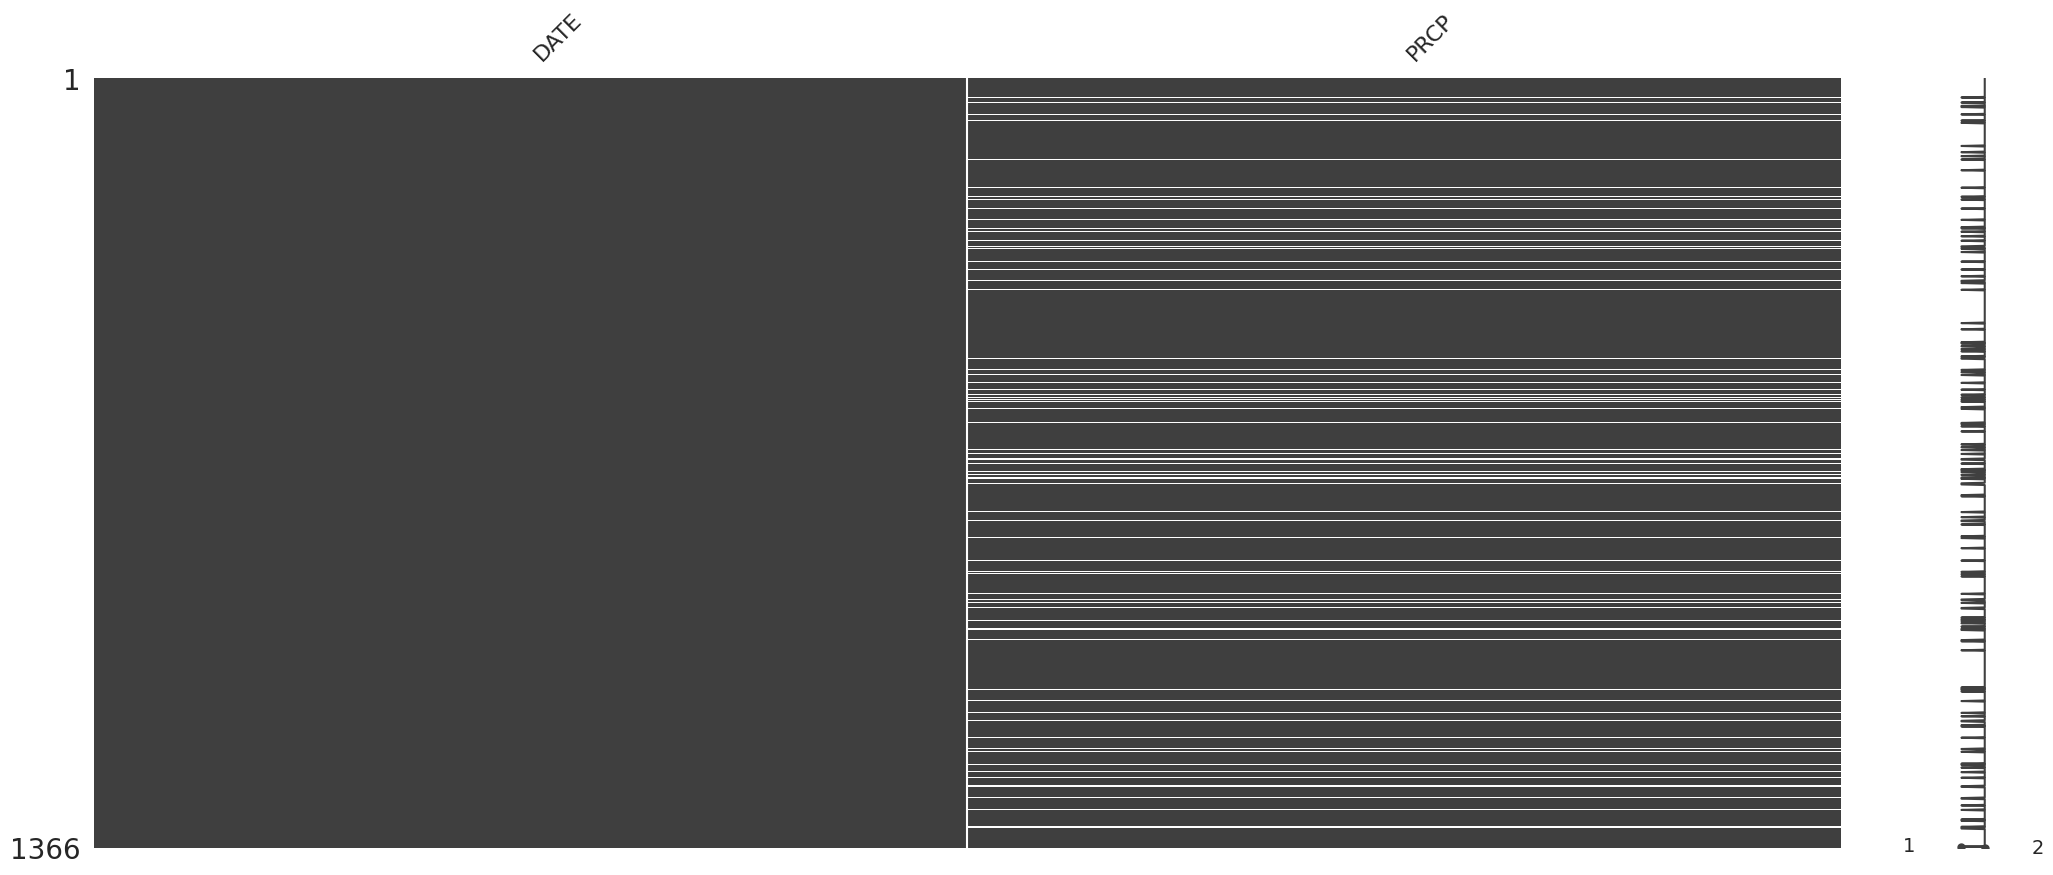

In [209]:
msno.matrix(df_seatac[["DATE", "PRCP"]]) # Shows a graphical representation of where the NaN values are.

The distribution of missing precipitation values at the SeaTac airport station seems relatively uniform, with precipitation data points missing throughout all the dates.

Since there is a duplicate in the JFK data, let's drop the duplicates before joining the DataFrames.

In [210]:
df_jfk = df_jfk.drop_duplicates(subset="DATE")
df_seatac = df_seatac.drop_duplicates(subset="DATE")
print(df_jfk.shape)
print(df_seatac.shape)

(1461, 6)
(1364, 6)


Now the JFK data has the right number of days, and there were some duplicates in the SeaTac data too.

## f) Join the Seattle and New York data frames, keeping only the date and precipitation values

SeaTac doesn't have data for all the dates, but JFK does. So, we should do a left join with JFK as the left dataset.

In [211]:
df = df_jfk[["DATE", "PRCP"]].merge(df_seatac[["DATE", "PRCP"]], on="DATE", how = "left")
df.shape

(1461, 3)

In [212]:
df

,DATE,PRCP_x,PRCP_y
0,2020-01-01,0.00,0.00
1,2020-01-02,0.00,0.21
2,2020-01-03,0.13,0.39
3,2020-01-04,0.16,0.10
4,2020-01-05,0.00,0.14
...,...,...,...
1456,2023-12-27,0.19,0.10
1457,2023-12-28,1.55,NaN
1458,2023-12-29,0.02,0.00
1459,2023-12-30,0.00,0.10


The joined DataFrame has 1461 rows (the right number of rows).

For clarity, let's rename the PRCP_x and PRCP_y columns to include the city names.

In [213]:
df = df.rename(columns={"PRCP_x":"ny_precipitation", "PRCP_y":"seattle_precipitation"})
df

,DATE,ny_precipitation,seattle_precipitation
0,2020-01-01,0.00,0.00
1,2020-01-02,0.00,0.21
2,2020-01-03,0.13,0.39
3,2020-01-04,0.16,0.10
4,2020-01-05,0.00,0.14
...,...,...,...
1456,2023-12-27,0.19,0.10
1457,2023-12-28,1.55,NaN
1458,2023-12-29,0.02,0.00
1459,2023-12-30,0.00,0.10


## g) Ensure that the data frame is in a tidy, or long, format

There are two columns with precipitation, so we need to combine them into one column to put the data frame into a tidy (long) format. We will add a city column.

### Converting the data to a long format

In [214]:
df = pd.melt(df, id_vars='DATE', var_name='CITY', value_name='PRCP')
df

,DATE,CITY,PRCP
0,2020-01-01,ny_precipitation,0.00
1,2020-01-02,ny_precipitation,0.00
2,2020-01-03,ny_precipitation,0.13
3,2020-01-04,ny_precipitation,0.16
4,2020-01-05,ny_precipitation,0.00
...,...,...,...
2917,2023-12-27,seattle_precipitation,0.10
2918,2023-12-28,seattle_precipitation,NaN
2919,2023-12-29,seattle_precipitation,0.00
2920,2023-12-30,seattle_precipitation,0.10


### Renaming the city labels

For clarity, let's rename the city labels in the CITY column.

In [215]:
df.loc[df["CITY"] == "ny_precipitation", "CITY"] = "NYC"
df.loc[df["CITY"] == "seattle_precipitation", "CITY"] = "SEA"
df

,DATE,CITY,PRCP
0,2020-01-01,NYC,0.00
1,2020-01-02,NYC,0.00
2,2020-01-03,NYC,0.13
3,2020-01-04,NYC,0.16
4,2020-01-05,NYC,0.00
...,...,...,...
2917,2023-12-27,SEA,0.10
2918,2023-12-28,SEA,NaN
2919,2023-12-29,SEA,0.00
2920,2023-12-30,SEA,0.10


## h) Rename the columns, if necessary, to follow best practices of being lowercase, snake case, and understandable

In [216]:
mapping_dict = {'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'}
df = df.rename(columns=mapping_dict)

In [217]:
df.head()

,date,city,precipitation
0,2020-01-01,NYC,0.00
1,2020-01-02,NYC,0.00
2,2020-01-03,NYC,0.13
3,2020-01-04,NYC,0.16
4,2020-01-05,NYC,0.00


The cell above shows that the columns were successfully renamed.

## e) Identify missing values in the datasets. Impute or remove NaN values, as appropriate.

### Visualize the missing data and see how many data points are missing

Let's visualize the date and precipitation columns.

<Axes: >

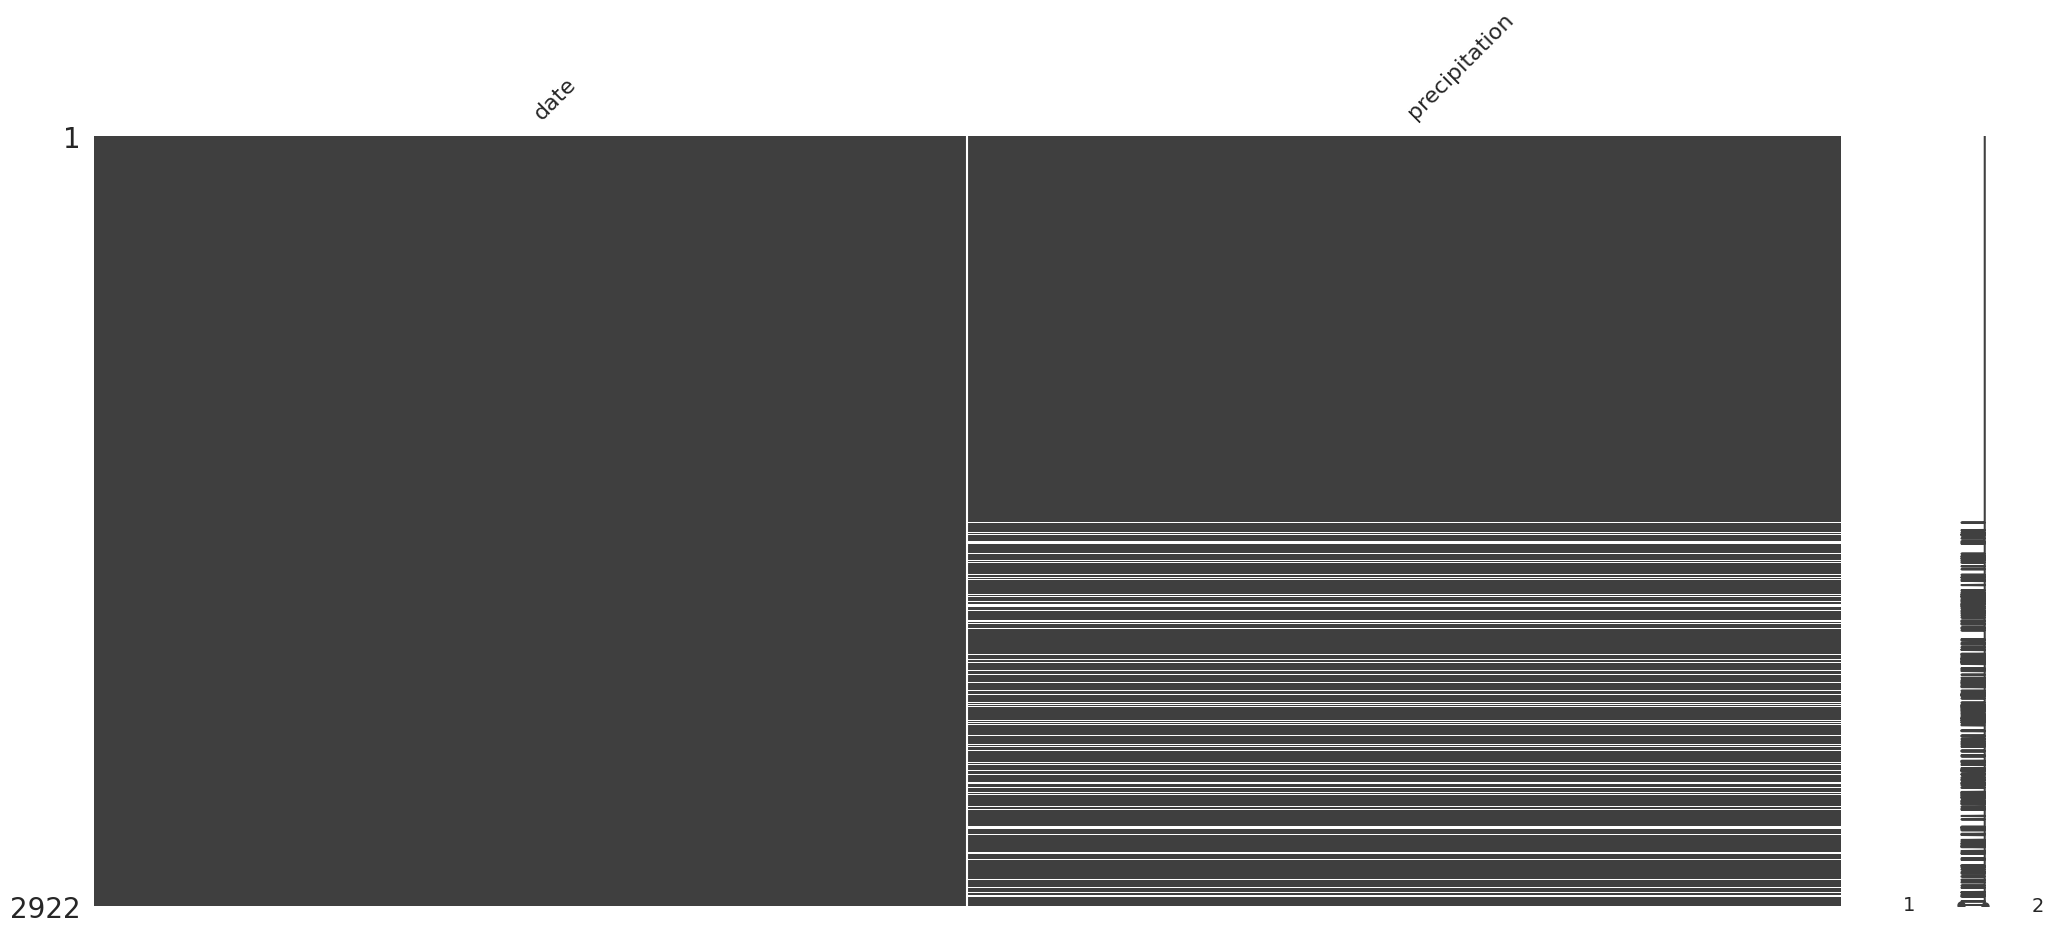

In [218]:
msno.matrix(df[["date", "precipitation"]])

The missing values in the second half of the precipitation column of the graph are from the SeaTac dataset. We know this since there were no missing values in the JFK dataset. Additionally, the distribution of the missing values in the second half of this graph looks the same as the distribution of the missing values in the SeaTac dataset.

In [219]:
df['precipitation'].isna().sum()

232

There are 232 missing precipitation values.

### Use linear interpolation to impute the missing data, and check that no more data is missing

In [220]:
df["precipitation"] = df["precipitation"].interpolate()

Let's check whether any data is still missing by summing the NA values and creating another matrix.

In [221]:
df['precipitation'].isna().sum()

0

<Axes: >

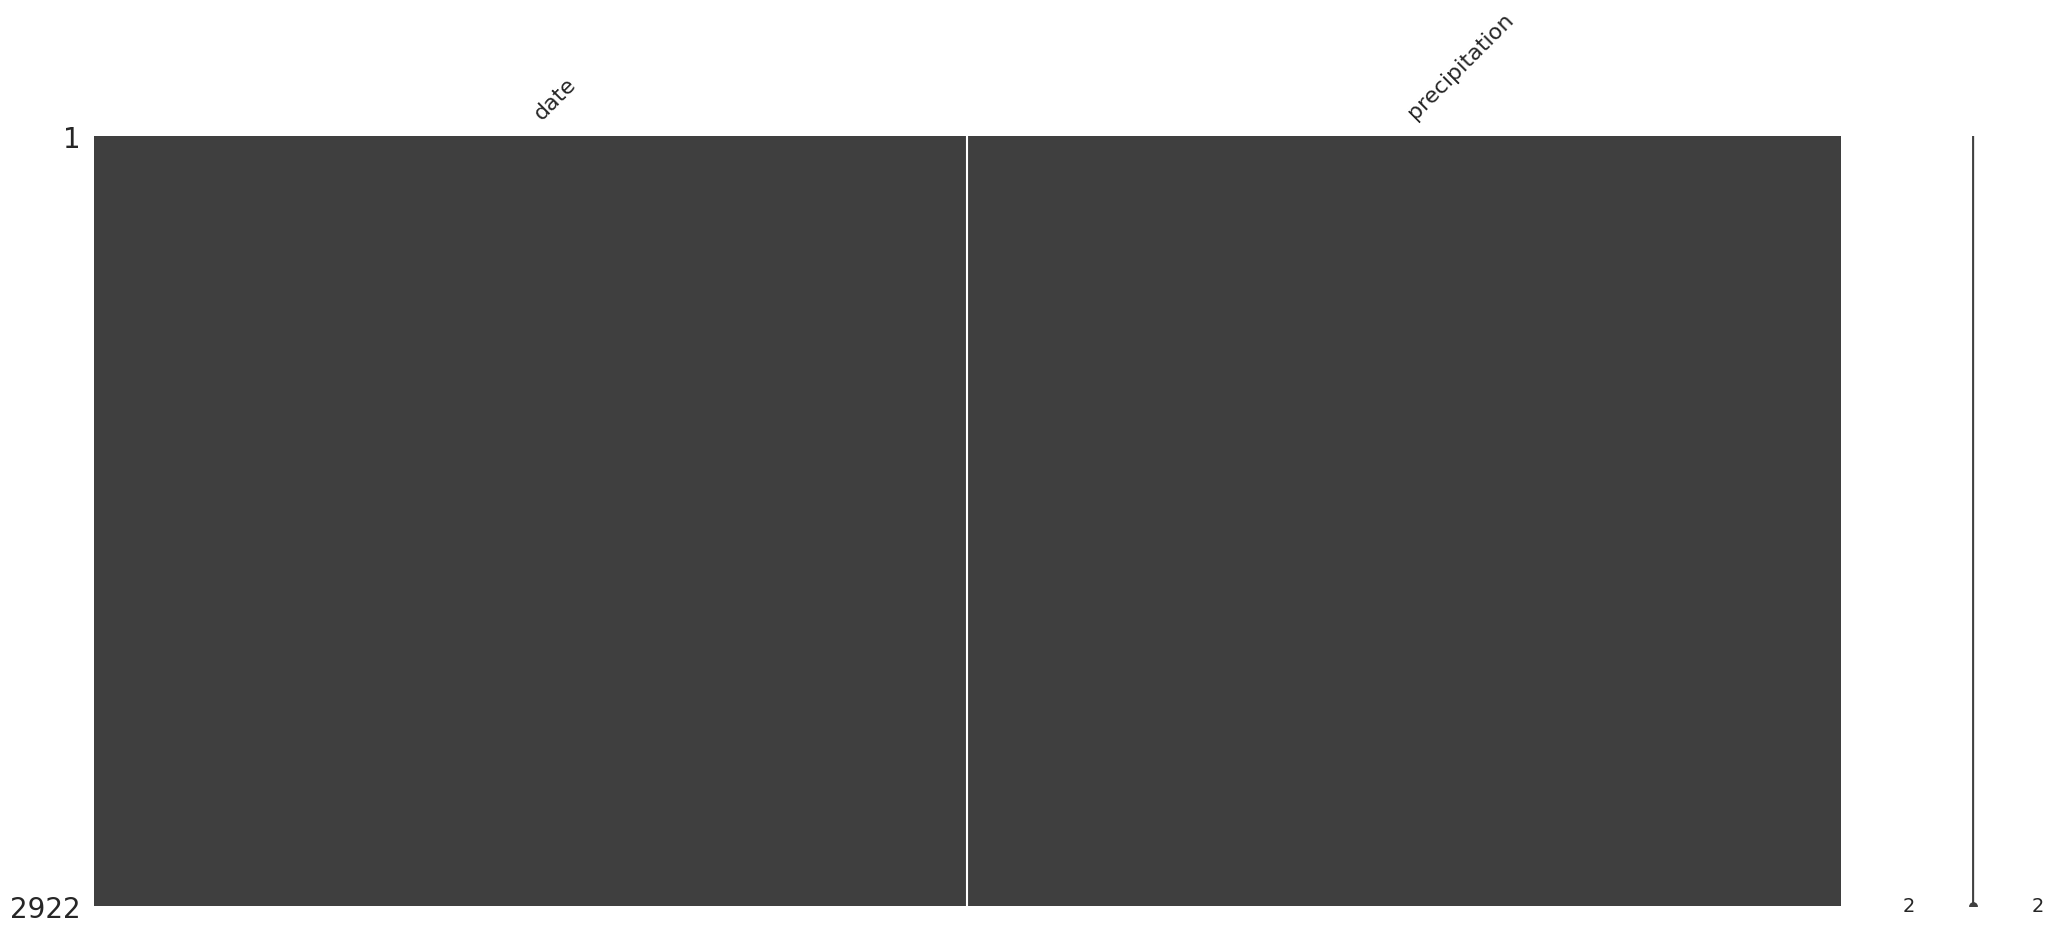

In [222]:
msno.matrix(df[['date', 'precipitation']])

As we can see, there is no more missing data.

## i) Create any derived variables that will be useful in the analysis.

###Adding derived variables for the month and year

Let's add two new columns to the dataset for which month and which year a data point belongs to. This way, we can make plots of precipitation by month and year.

In [223]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [224]:
df.head()

,date,city,precipitation,month,year
0,2020-01-01,NYC,0.00,1,2020
1,2020-01-02,NYC,0.00,1,2020
2,2020-01-03,NYC,0.13,1,2020
3,2020-01-04,NYC,0.16,1,2020
4,2020-01-05,NYC,0.00,1,2020


In [225]:
df.tail()

,date,city,precipitation,month,year
2917,2023-12-27,SEA,0.10,12,2023
2918,2023-12-28,SEA,0.05,12,2023
2919,2023-12-29,SEA,0.00,12,2023
2920,2023-12-30,SEA,0.10,12,2023
2921,2023-12-31,SEA,0.00,12,2023


We successfully added the columns, and by looking at the first and last five rows, the month and year are correct.

## j) Export the clean data set as a csv file and upload the csv file to your Github repository for the project

In [226]:
df.to_csv('clean_seattle_nyc_weather.csv', index=False)